<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/BreamandSmelt_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

column_stack은 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다. 

In [4]:
fish_data=np.column_stack((fish_length,fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


타깃 데이터
np.ones() 와 np.zeros() 함수를 이용하면 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다.

In [8]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# 사이킷런으로 훈련 세트와 테스트 세트 나누기
- train_test_split()함수는 전달되는 리스트나 배열의 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.
- 나누고 싶으 ㄴ리스트나 배열을 원하는 만큼 전달하면 된다. 
- fish_data 와 fish_target을 나누겠다. 

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)

In [14]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [15]:
print(train_target.shape,test_target.shape)

(36,) (13,)


타깃 데이터는 1차원 배열

In [17]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에 10개가 도미이고 3개가 빙어이다. 잘 섞인 것 같지만 빙어의 비율이 모자라다. 원래 도미와 빙어의 개수가 35와 14이므로 두 생선의 비율은 2.5:1 이다. 하지만 이 테스트 세트의 도미와 빙어의 비율은 3.3:1이다. 샘플링 편향이 여기서 좀 나타난 것이다. 

아 문제를 해결할 방법이 있다. 바로 train_test_split()에 stratify 매개변수에 티깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 

In [19]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

In [20]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


##준비한 데이터로 K-최근접 이웃 훈련하기

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

데스트 세트의 도미와 빙어를 모두 올바르게 분류했다.

In [25]:
print(kn.predict([[25,150]]))

[0.]


??데이터가 빙어를 가리키기에 너무 크다... 

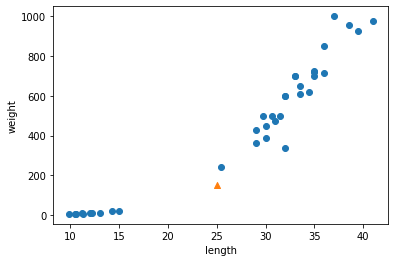

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 샘플은 도미데이터에 가까운데 왜 빙어 데이터에 가깝다고 판단한 것일까?

k-최근접 이웃은 주변의 샘플 중 다수인 클래스를 예측으로 사용한다. KNeighborsClassfier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors()메서드를 제공한다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환하는데 KNeighnorsClassifier 클래스의 이웃 개수인 n_neighbors의 기본 값은 5이므로, 5개의 이웃이 반환된다.

In [28]:
distances,indexes=kn.kneighbors([[25,150]])

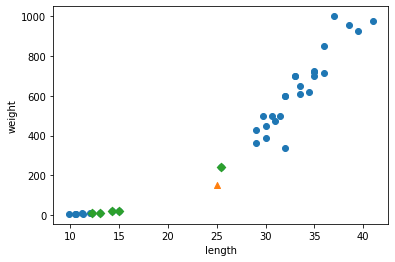

In [29]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시되었다. 1개만 도미고 4개는 모두 빙어이다.

In [30]:
print(train_input[indexes])#

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [31]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


역시나 빙어가 압도적으로 가깝다. 

In [32]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


# 기준 맞추기
-

In [33]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [35]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


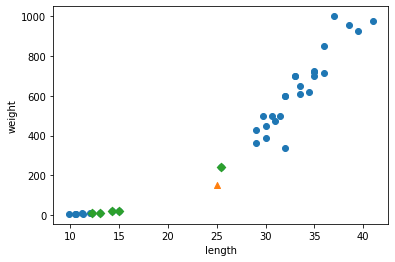

In [36]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 자료들을 보면 빙어와의 거리는 130이고 도미와의 거리는 90이라고 나오는데 족히 몇 배는 되어보이는데 차이가 얼마 안난다는게 이상하다.. 
그이유는 X축은 범위가 좁고 Y축은 범위가 넓기 때문이다.

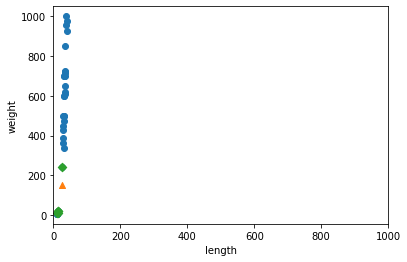

In [37]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

y축과 동일하게 x축의 범위를 맞춰주었다.거의 수직으로 늘어선 형태가 되었는데, 생선의 길이인 X축은 가까운 이웃을 찾는데 영향을 미치지 못할 것이다..

 특성의 값이 놓인 범위가 매우 다른데 이를 두 특성의 *스케일*이 다르다고 말하기도 한다. 

 k-최근접 이웃 과 같은 알고리즘은 샘플간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞추어주어야 한다. 이를 **데이터 전처리**라고 한다. 

In [38]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

가장 널리 사용하는 전처리 방법 중 하나는 표준 점수이다. (z점수라고 부르기도 함)
평균을 빼고 표준편차로 나누어 주면 된다.

In [39]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [40]:
train_scaled=(train_input-mean)/std

#전처리 데이터로 모델 훈련하기

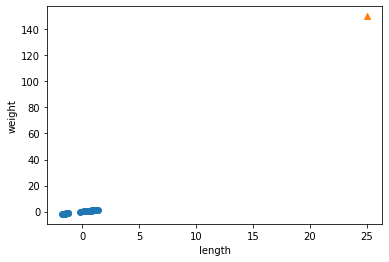

In [41]:
plt.scatter(train_scaled[:,0],train_scaled[:,0])
plt.scatter(25,150,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트를 mean으로 빼고 std로 나누어 주었기 때문에 값의 범위가 달라진 것이다. 훈련세트의 mean과 std를 이용해서 변환해야 한다. 

In [42]:
new=([25,150]-mean)/std

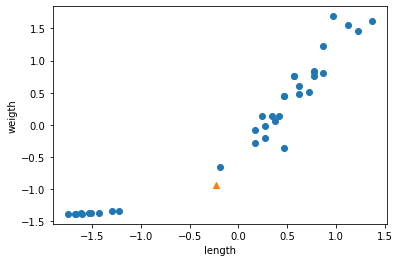

In [44]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

이제 표준편차로 변환하기 전의 산점도와 거의 동일하다. 크게 달라진 것은 x축과 y축의 범위가 -1.5 1.5 사이로 바뀌었다는 것이다. 

In [45]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
test_scaled=(test_input-mean)/std

In [47]:
kn.score(test_scaled,test_target)

1.0

In [48]:
print(kn.predict([new]))

[1.]


이제 완벽하게 도미로 예측한다

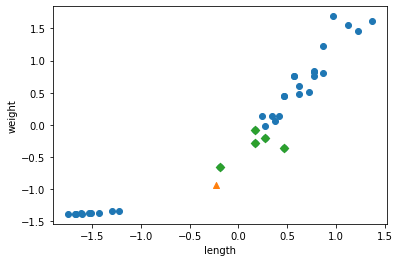

In [50]:
distances,indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()